### Author:- ***Abhishek Kumar***
### Project Domain:- ***Big Basket Anlysis Project***

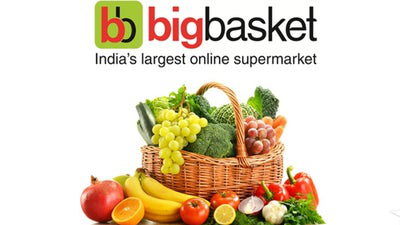

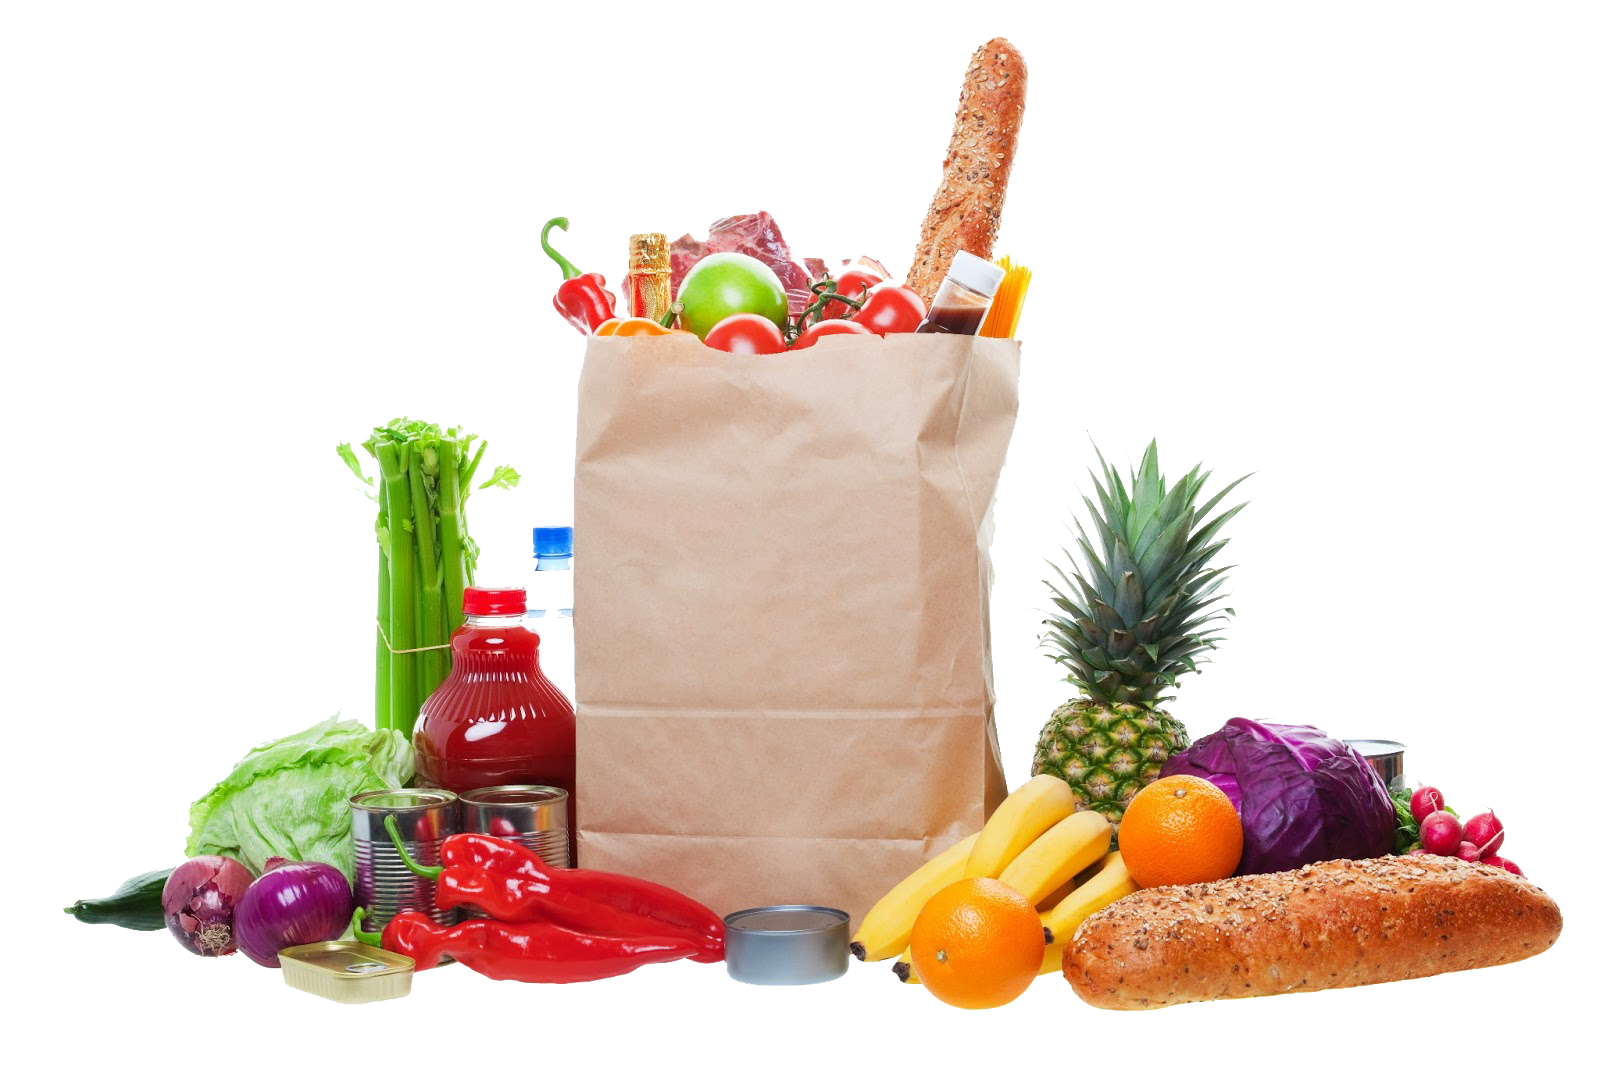

#### Step 1:- Import all Neccesary Packages and Libraries:--

In [104]:
!pip install apyori

In [105]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
from apyori import apriori

#### Step 2:- Now Upload Dataset from google colab:--

In [106]:
# Upload the CSV file
from google.colab import files
uploaded = files.upload()

Saving Groceries_dataset.csv to Groceries_dataset (2).csv


#### Step 3:- Now Read the CSV File from the Groceries_Dataset:--

In [107]:
# Read the CSV file into a DataFrame
data = 'Groceries_dataset (2).csv'
df = pd.read_csv('Groceries_dataset (2).csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


#### Step 4:- Now we have perform some Basic Analysis over the  Dataset:--

In [108]:
df.shape

(38765, 3)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


#*5.Exploratory Data Analysis and Visualization*

In [52]:
df.isnull().sum().sort_values(ascending= False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [109]:
df.itemDescription.unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [110]:
# Data Analysis and Visualization
# Number of unique items
unique_items = df['itemDescription'].nunique()
print(f'Number of unique items: {unique_items}')

Number of unique items: 167


#To Identify the Top 10 Most Frequently Sold Items from the dataset:-

In [111]:
# Top 10 most frequent items
top_items = df['itemDescription'].value_counts().head(10)
print('Top 10 most frequent items:')
print(top_items)

Top 10 most frequent items:
itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64


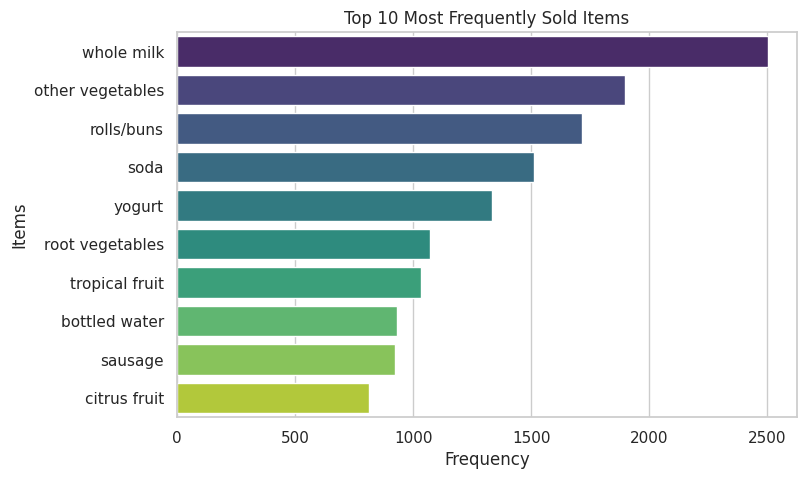

In [138]:
# Plot the top 10 most frequent items
plt.figure(figsize=(8, 5))
sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')
plt.title('Top 10 Most Frequently Sold Items')
plt.xlabel('Frequency')
plt.ylabel('Items')
plt.show()

#*To Identify the Number of transactions per member*

In [57]:
# Number of transactions per member
transactions_per_member = df.groupby('Member_number')['Date'].count().sort_values(ascending=False)
print('Transactions per member:')
print(transactions_per_member.describe())

Transactions per member:
count    3898.000000
mean        9.944844
std         5.310796
min         2.000000
25%         6.000000
50%         9.000000
75%        13.000000
max        36.000000
Name: Date, dtype: float64


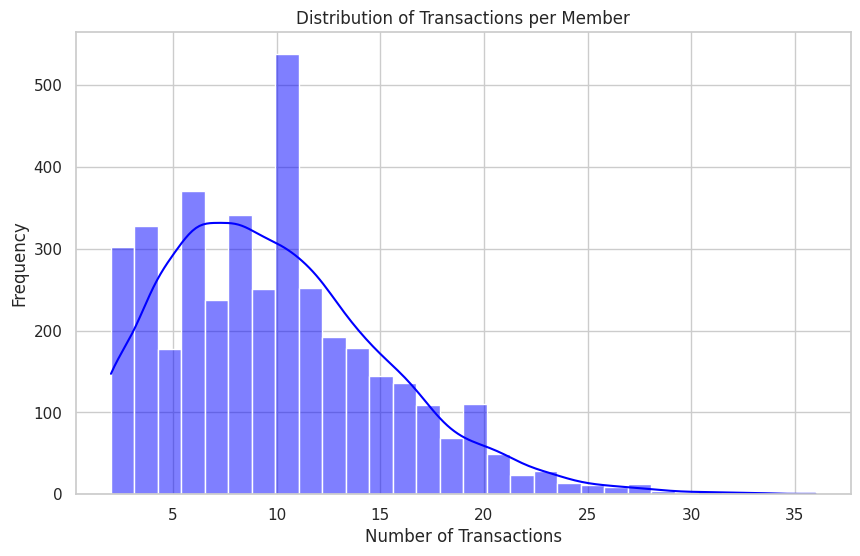

In [58]:
# Plot the distribution of transactions per member
plt.figure(figsize=(10, 6))
sns.histplot(transactions_per_member, bins=30, kde=True, color='blue')
plt.title('Distribution of Transactions per Member')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

#*To Identify the Sales over the period in Quarter - wise*

In [112]:
# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [113]:
# Extract year and quarter from the Date
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.to_period('Q')

In [114]:
# Group by Year and Quarter and count the number of transactions per quarter
quarterly_sales = df.groupby(['Year', 'Quarter']).size().reset_index(name='Sales')

# Convert Quarter back to datetime for plotting
quarterly_sales['Quarter'] = quarterly_sales['Quarter'].dt.to_timestamp()

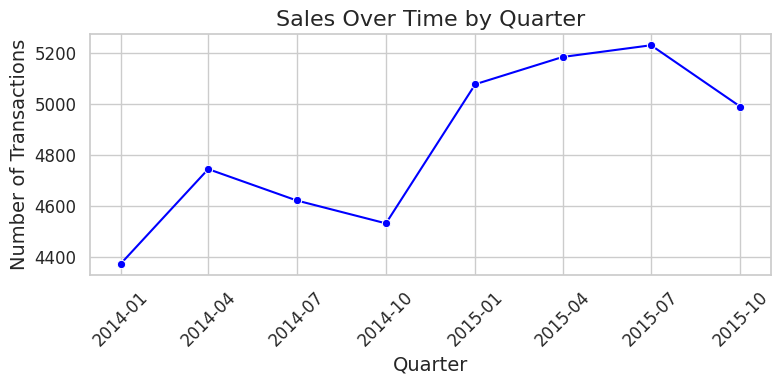

In [115]:
# Plot the sales over time using a line chart
plt.figure(figsize=(8, 4))
sns.lineplot(x='Quarter', y='Sales', data=quarterly_sales, marker='o', color='blue')
plt.title('Sales Over Time by Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#*From this, Identifying the products that are frequently sold at higher times*

In [116]:
# Filter the dataset for the specified date range
start_date = '2014-10-01'
end_date = '2015-07-31'
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Get the unique items sold in this period
unique_items_sold = filtered_df['itemDescription'].unique()

# Display the unique items
print("Products sold between 2014-10 and 2015-07:")
print(unique_items_sold)

Products sold between 2014-10 and 2015-07:
['tropical fruit' 'whole milk' 'rolls/buns' 'other vegetables'
 'citrus fruit' 'beef' 'frankfurter' 'butter' 'fruit/vegetable juice'
 'packaged fruit/vegetables' 'bottled water' 'yogurt' 'sausage'
 'brown bread' 'pastry' 'root vegetables' 'berries' 'coffee'
 'misc. beverages' 'canned beer' 'ham' 'turkey' 'curd cheese'
 'red/blush wine' 'frozen potato products' 'chocolate' 'herbs' 'soda'
 'chicken' 'hamburger meat' 'specialty bar' 'newspapers' 'curd'
 'butter milk' 'pasta' 'grapes' 'popcorn' 'finished products' 'beverages'
 'bottled beer' 'dessert' 'dog food' 'specialty chocolate' 'cleaner'
 'white wine' 'ice cream' 'meat' 'hard cheese' 'cream cheese ' 'pork'
 'pip fruit' 'pickled vegetables' 'liquor (appetizer)' 'candy'
 'hair spray' 'photo/film' 'domestic eggs' 'margarine' 'shopping bags'
 'salt' 'oil' 'onions' 'sliced cheese' 'dish cleaner' 'baking powder'
 'salty snack' 'Instant food products' 'sparkling wine'
 'female sanitary products' 'w

#*Analysing the Top 10 Frequently sold products in between the higher peak from Oct 2014 to July 2015*

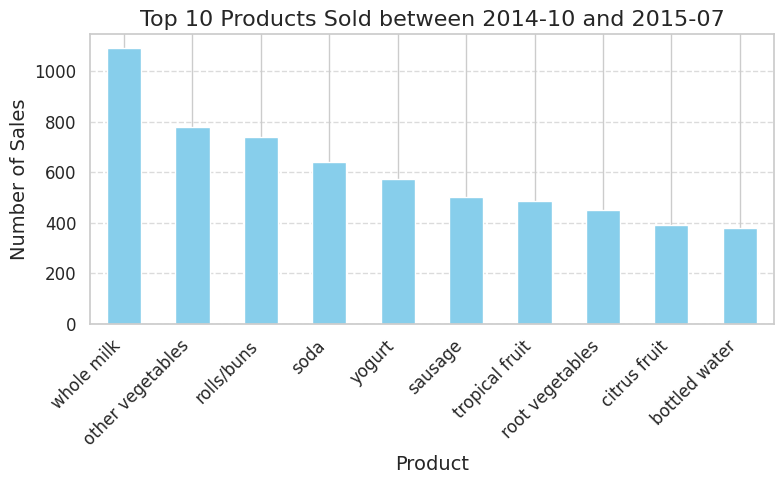

In [117]:
# Count the occurrences of each product
product_counts = filtered_df['itemDescription'].value_counts()

# Get the top 10 sold products
top_10_products = product_counts.head(10)

# Plotting the top 10 products sold
plt.figure(figsize=(8, 5))
top_10_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products Sold between 2014-10 and 2015-07', fontsize=16)
plt.xlabel('Product', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#*6. Model Preparation*

In [121]:
#Ordering the dataset by "Member_number" in ascending order to group the Customer transactions

cust_level = df[["Member_number", "itemDescription"]].sort_values(by= "Member_number", ascending = False)
cust_level["itemDescription"] = cust_level ["itemDescription"].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [125]:
#Converting itemDescription column to list to perform the apriori algorithm
transactions=[a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(["Member_number"]))]

In [134]:
#Assiging the Association rules
rules=apriori(transactions=transactions, min_support= 0.003, min_confidence= 0.05, min_lift= 3, min_length = 2)

In [135]:
#Storing and Printing the Results
results=list(rules)
results

[RelationRecord(items=frozenset({'meat spreads', 'domestic eggs'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic eggs'}), confidence=0.4, lift=3.0042389210019267)]),
 RelationRecord(items=frozenset({'napkins', 'rice'}), support=0.0030785017957927143, ordered_statistics=[OrderedStatistic(items_base=frozenset({'rice'}), items_add=frozenset({'napkins'}), confidence=0.2448979591836735, lift=3.011395094315329)]),
 RelationRecord(items=frozenset({'baking powder', 'chocolate', 'bottled water'}), support=0.0030785017957927143, ordered_statistics=[OrderedStatistic(items_base=frozenset({'baking powder'}), items_add=frozenset({'chocolate', 'bottled water'}), confidence=0.09917355371900827, lift=3.9446786979254513), OrderedStatistic(items_base=frozenset({'baking powder', 'bottled water'}), items_add=frozenset({'chocolate'}), confidence=0.31578947368421056, lift=3.6526628143057946), OrderedStatistic(items_

#*7.Result*

In [136]:
#To Display the result in well organised way using Pandas DataFrame
def inspect(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns= ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [137]:
#From the results picking the Top 10 Best Frequently Purchased Combos
resultsinDataFrame.nlargest(n=10, columns='Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
383,bottled water,yogurt,0.003079,0.157895,6.689931
230,oil,other vegetables,0.003335,0.059908,5.838018
445,bottled water,newspapers,0.003079,0.068182,5.654739
385,other vegetables,shopping bags,0.003079,0.083333,5.505650
25,meat spreads,domestic eggs,0.003335,0.371429,5.284046
519,butter,other vegetables,0.003079,0.141176,5.191565
491,curd,shopping bags,0.003335,0.166667,5.036176
532,canned beer,newspapers,0.003335,0.130000,4.968039
68,bottled water,shopping bags,0.003079,0.157895,4.963497
270,rolls/buns,shopping bags,0.003335,0.094203,4.962201


#*8.Conclusion*

**Objective:**<br>

The primary goal of this analysis was to identify the top 10 most frequently purchased product combinations from the grocery dataset. This analysis aimed to provide insights that could help optimize product placement, marketing strategies, and overall customer satisfaction.

<br>

**Key Findings:**<br>

The analysis revealed the following top 10 product combinations:<br>

Combo 1: Bottled Water, Yogurt <br>
Combo 2: Oil, Other Vegetables<br>
Combo 3: Bottled Water, Newspaper<br>
Combo 4: Other Vegetables, Shopping Bags<br>
Combo 5: Meat Speards, Domestic Eggs<br>
Combo 6: Butter, Other Vegetables<br>
Combo 7: Curd, Shopping Bags<br>
Combo 8: Canned Beer, Newspaper<br>
Combo 9: Bottled Water, Shopping Bags<br>
Combo 10: Rolls/buns, Shopping Bags

<br>

**Interpretation:**<br>

The identified combinations reflect typical consumer behavior and shopping patterns:<br>

**1. Bottled Water Combinations:** Bottled water appears in three of the top 10 combos, suggesting its popularity and frequent pairing with other items such as yogurt, newspapers, and shopping bags.<br>

**2. Vegetable Pairings:** Other vegetables are frequently bought with shopping bags, oil, and butter, indicating a common grocery shopping pattern where fresh produce and essential cooking ingredients are purchased together.<br>

**3. Convenience Items:** The presence of items like newspapers, shopping bags, and canned beer in the top combos indicates the convenience-oriented purchases often made by customers.<br>

**4. Breakfast and Dairy Products:** Combinations such as meat spreads with domestic eggs and curd with shopping bags suggest common breakfast or meal preparation behaviors.

<br>

**Actionable Insights:**<br>

**1.Product Placement:**<br>

**--> Strategic Positioning:** Place frequently bought together items like bottled water and yogurt, and other vegetables and shopping bags, in close proximity to encourage cross-selling.<br>

**--> Convenience Sections:** Create dedicated sections for convenience items such as newspapers and shopping bags near checkout areas to facilitate quick purchases.<br>

**2.Marketing Strategies:**<br>

**--> Promotional Bundles:** Develop bundle promotions for popular combinations. For example, offer a discount when customers buy bottled water and yogurt together, or other vegetables and shopping bags.<br>

**--> Targeted Offers:** Use these insights to create targeted marketing campaigns, such as discounts on breakfast combos like meat spreads and domestic eggs.<br>

**3.Inventory Management:**<br>

**--> Stock Management:** Ensure that frequently paired items are always in stock. For instance, maintain a steady supply of bottled water, other vegetables, and shopping bags to meet customer demand.<br>

**--> Seasonal Adjustments:** Monitor seasonal trends and adjust inventory levels accordingly to maintain availability of popular items.

**4.Customer Engagement:**<br>

**--> Personalized Recommendations:** Use customer purchase history to offer personalized product recommendations, encouraging repeat purchases of their preferred combinations.<br>

**--> Loyalty Programs:** Implement loyalty programs that reward customers for buying popular combos, enhancing customer satisfaction and retention.<br>